As a stepping stone between SATLAS and SATLAS2, an interface has been provided which can mostly be used as a drop-in replacement for code that uses the SATLAS syntax. Note that not all functionalities have been implemented in this fashion. For users that require these functionalities, we recommend migrating to SATLAS2.

In [1]:
import sys
import time

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

sys.path.insert(0, '..\src')

import satlas2
import satlas as sat


def modifiedSqrt(input):
    output = np.sqrt(input)
    output[input <= 0] = 1e-3
    return output

# Fitting a single hyperfine spectrum

The most common task, and the one this interface is meant for, is fitting a single hyperfine spectrum. A special class in SATLAS2 called *HFSModel* has been created as a replacement for the equivalent SATLAS *HFSModel*. Note that the normal hyperfine spectrum model in SATLAS2 is called *HFS*.

In [2]:
spin = 3.5
J = [0.5, 1.5]
A = [9600, 175]
B = [0, 315]
C = [0, 0]
FWHMG = 135
FWHML = 101
centroid = 480
bkg = [100]
scale = 90

x = np.arange(-17500, -14500, 40)
x = np.hstack([x, np.arange(20000, 23000, 40)])

rng = np.random.default_rng(0)
hfs = satlas2.HFSModel(I=spin,
                       J=J,
                       ABC=[A[0], A[1], B[0], B[1], C[0], C[1]],
                       centroid=centroid,
                       fwhm=[FWHMG, FWHML],
                       scale=scale,
                       background_params=bkg,
                       use_racah=True)

C:\Users\megat\Documents\git_repositories\personal\satlas2\examples\..\src\satlas2\models\hfsModel.py:284: RuntimeWarning: invalid value encountered in scalar divide
  shift = phase * n / d


The object called *hfs* can be used with the syntax of SATLAS. Generating Poisson-distributed data is done by simply calling the function with frequency values as an argument, and using the result for the NumPy Poisson random number generator.

In [3]:
y = hfs(x)
y = rng.poisson(y)

In order to demonstrate the difference in performance, the centroid is offset by 100 from the actual value and the fitting is done by both the interface and SATLAS.

C:\Users\megat\.conda\envs\satlas2\Lib\site-packages\satlas\models\hfsmodel.py:573: RuntimeWarning: invalid value encountered in divide
  D = (3*C*(C+1) - 4*I*(I+1)*J*(J+1)) / (2*I*(2*I-1)*J*(2*J-1))
C:\Users\megat\.conda\envs\satlas2\Lib\site-packages\satlas\models\hfsmodel.py:574: RuntimeWarning: invalid value encountered in divide
  E = (10*(0.5*C)**3 + 20*(0.5*C)**2 + C*(-3*I*(I+1)*J*(J+1) + I*(I+1) + J*(J+1) + 3) - 5*I*(I+1)*J*(J+1)) / (I*(I-1)*(2*I-1)*J*(J-1)*(2*J-1))


Fitting 1 dataset with chisquare (Pearson, satlas2)...
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 137
    # data points      = 150
    # variables        = 8
    chi-square         = 151.188938
    reduced chi-square = 1.06471083
    Akaike info crit   = 17.1842512
    Bayesian info crit = 41.2693335
[[Variables]]
    Fit___HFModel__3_5___centroid:  482.548153 +/- 7.56664273 (1.57%) (init = 380)
    Fit___HFModel__3_5___Al:        9604.53248 +/- 6.41301473 (0.07%) (init = 9600)
    Fit___HFModel__3_5___Au:        176.460908 +/- 2.73509313 (1.55%) (init = 175)
    Fit___HFModel__3_5___Bl:        0 (fixed)
    Fit___HFModel__3_5___Bu:        348.564601 +/- 19.6945247 (5.65%) (init = 315)
    Fit___HFModel__3_5___Cl:        0 (fixed)
    Fit___HFModel__3_5___Cu:        0 (fixed)
    Fit___HFModel__3_5___FWHMG:     142.382561 +/- 57.6647446 (40.50%) (init = 135)
    Fit___HFModel__3_5___FWHML:     100.522928 +/- 63.5247534 (63.19%) (init = 101)
    Fit___H

Chisquare fitting done: 172it [00:00, 190.57it/s]                            


NDoF: 142, Chisquare: 151.18894, Reduced Chisquare: 1.0647108
Akaike Information Criterium: 17.18425, Bayesian Information Criterium: 41.269333
Errors not scaled with reduced chisquare.


C:\Users\megat\.conda\envs\satlas2\Lib\site-packages\lmfit\printfuncs.py:177: RuntimeWarning: invalid value encountered in scalar divide
  spercent = f'({abs(par.stderr/par.value):.2%})'


[[Variables]]
    FWHMG:        142.398641 +/- 55.8806202 (39.24%) (init = 142.3867)
    FWHML:        100.507637 +/- 61.5685626 (61.26%) (init = 100.519)
    TotalFWHM:    203.616071 +/- 20.6442157 (10.14%) == '0.5346*FWHML+(0.2166*FWHML**2+FWHMG**2)**0.5'
    Scale:        89.2388854 +/- 6.93231223 (7.77%) (init = 89.23958)
    Saturation:   0 (fixed)
    Amp3__2:      0.4546399 (fixed)
    Amp3__3:      0.4773649 (fixed)
    Amp3__4:      0.3410048 (fixed)
    Amp4__3:      0.1591578 (fixed)
    Amp4__4:      0.4773975 (fixed)
    Amp4__5:      1 (fixed)
    Al:           9604.53225 +/- 6.21516055 (0.06%) (init = 9604.532)
    Au:           176.461706 +/- 2.65071396 (1.50%) (init = 176.4611)
    Bl:           0 (fixed)
    Bu:           348.556407 +/- 19.0869596 (5.48%) (init = 348.5624)
    Cl:           0 (fixed)
    Cu:           0 (fixed)
    Centroid:     482.545220 +/- 7.33323399 (1.52%) (init = 482.5474)
    Background0:  100.670920 +/- 1.54379765 (1.53%) (init = 100.6708)
  

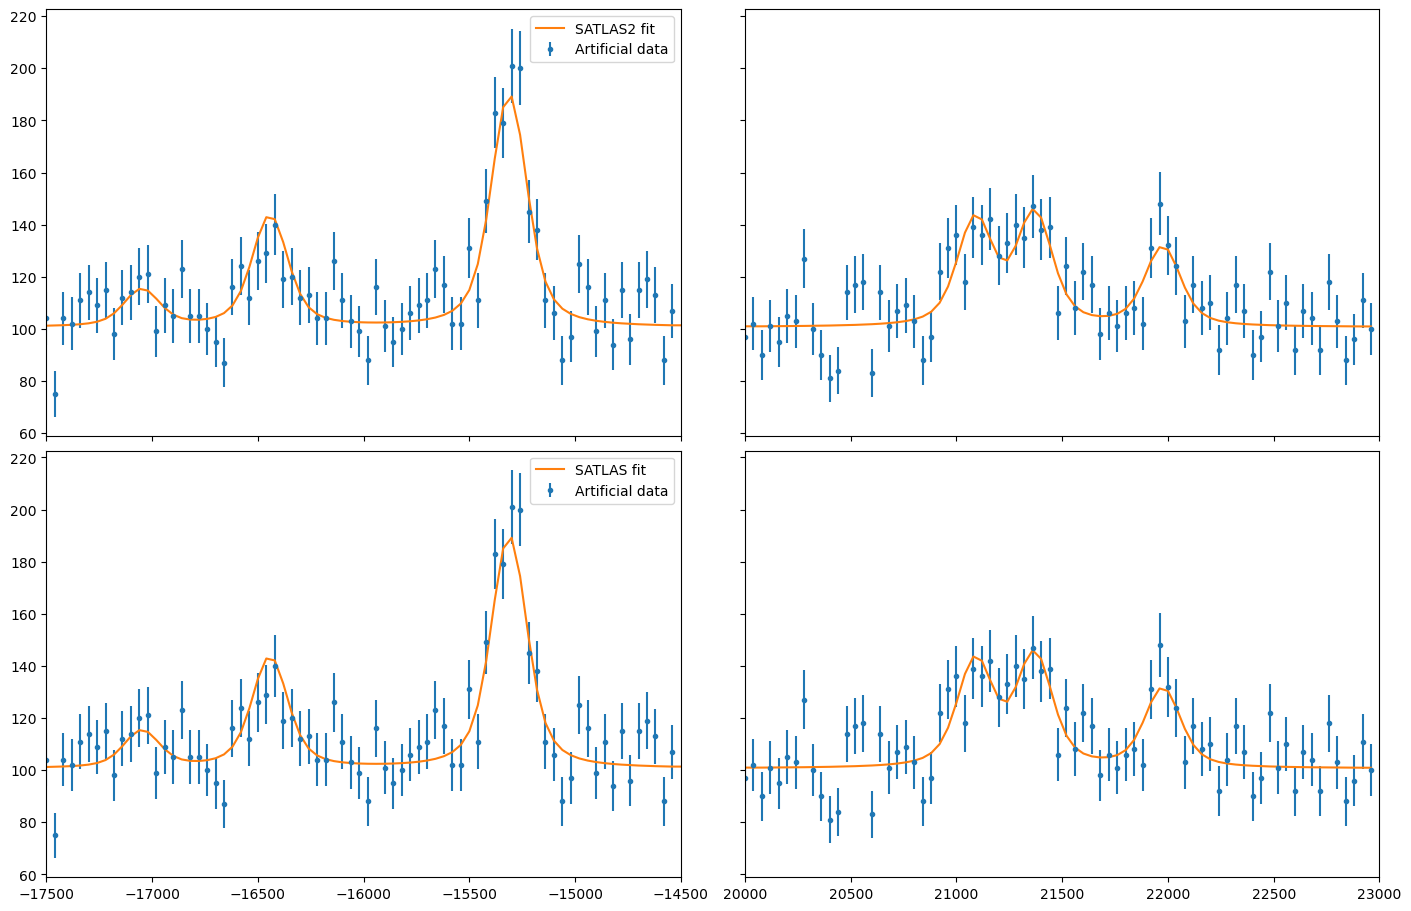

In [4]:
hfs.params['centroid'].value = centroid - 100
hfs1 = sat.HFSModel(spin,
                    J, [A[0], A[1], B[0], B[1], C[0], C[1]],
                    centroid - 100, [FWHMG, FWHML],
                    scale=scale,
                    background_params=bkg,
                    use_racah=True)
hfs1.set_variation({'Cu': False, 'Cl': False})

print('Fitting 1 dataset with chisquare (Pearson, satlas2)...')
start = time.time()
f = satlas2.chisquare_fit(hfs, x, y, modifiedSqrt(y), show_correl=False)
stop = time.time()
dt1 = stop - start

print('Fitting 1 dataset with chisquare (Pearson, satlas1)...')
start = time.time()
sat.chisquare_fit(hfs1, x, y, modifiedSqrt(y))
hfs1.display_chisquare_fit(show_correl=False)
stop = time.time()
dt2 = stop - start
print('SATLAS2: {:.3} s, {:.0f} function evaluations'.format(
    dt1, f.result.nfev))
print('SATLAS1: {:.3} s'.format(dt2))

fig = plt.figure(constrained_layout=True, figsize=(14, 9))
gs = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)
ax11 = fig.add_subplot(gs[0, 0])
ax11.label_outer()
ax12 = fig.add_subplot(gs[0, 1])
ax12.label_outer()
ax21 = fig.add_subplot(gs[1, 0])
ax21.label_outer()
ax22 = fig.add_subplot(gs[1, 1])
ax22.label_outer()

ax11.errorbar(x, y, modifiedSqrt(y), fmt='.', label='Artificial data')
ax11.plot(x, hfs(x), '-', label='SATLAS2 fit')
ax11.set_xlim(-17500, -14500)
ax12.errorbar(x, y, modifiedSqrt(y), fmt='.', label='Artificial data')
ax12.plot(x, hfs(x), '-', label='SATLAS2 fit')
ax12.set_xlim(20000, 23000)
ax21.errorbar(x, y, modifiedSqrt(y), fmt='.', label='Artificial data')
ax21.plot(x, hfs1(x), '-', label='SATLAS fit')
ax21.set_xlim(-17500, -14500)
ax22.errorbar(x, y, modifiedSqrt(y), fmt='.', label='Artificial data')
ax22.plot(x, hfs1(x), '-', label='SATLAS fit')
ax22.set_xlim(20000, 23000)
ax11.legend()
ax21.legend()
plt.show()

Note that the results are functionally identical: the slight difference is due to a more modern implementation of the least squares fitting routine that is used under the hood by SATLAS2. The speedup by using SATLAS 2 is about a factor 20 for a single spectrum.

# Overlapping hyperfine spectra

The other most common usecase for SATLAS was analysis of spectra with an isomer present, resulting in overlapping spectra. In the SATLAS terminology, this would result in a *SumModel* being used. In SATLAS2, a second *HFS* is simply added to the Source. However, the interface does provide the folllowing functionality:

Fitting 1 dataset with chisquare (Pearson, satlas2)...
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 478
    # data points      = 175
    # variables        = 16
    chi-square         = 177.740442
    reduced chi-square = 1.11786441
    Akaike info crit   = 34.7192061
    Bayesian info crit = 85.3557816
[[Variables]]
    Fit___HFModel__4___centroid:       414.235866 +/- 5.99620727 (1.45%) (init = 300)
    Fit___HFModel__4___Al:             5311.00532 +/- 4.29854814 (0.08%) (init = 5300)
    Fit___HFModel__4___Au:             105.690572 +/- 1.88731364 (1.79%) (init = 100)
    Fit___HFModel__4___Bl:             0 (fixed)
    Fit___HFModel__4___Bu:             206.351613 +/- 16.1503450 (7.83%) (init = 230)
    Fit___HFModel__4___Cl:             0 (fixed)
    Fit___HFModel__4___Cu:             0 (fixed)
    Fit___HFModel__4___FWHMG:          66.4215352 +/- 61.6718544 (92.85%) (init = 135)
    Fit___HFModel__4___FWHML:          147.233143 +/- 34.7935972 (23.6

Chisquare fitting done: 406it [00:11, 34.80it/s]                            


NDoF: 159, Chisquare: 805.45528, Reduced Chisquare: 5.0657565
Akaike Information Criterium: 299.1588, Bayesian Information Criterium: 349.79538
Errors not scaled with reduced chisquare.
[[Variables]]
    s0_FWHMG:          51.7850360 +/- 108.077126 (208.70%) (init = 51.78504)
    s0_FWHML:          202.518837 +/- 39.5642239 (19.54%) (init = 202.5188)
    s0_TotalFWHM:      215.808637 +/- 25.2286012 (11.69%) == '0.5346*s0_FWHML+(0.2166*s0_FWHML**2+s0_FWHMG**2)**0.5'
    s0_Scale:          85.8738089 +/- 6.45428695 (7.52%) (init = 85.87381)
    s0_Saturation:     0 (fixed)
    s0_Amp7_2__5_2:    0.5000937 (fixed)
    s0_Amp7_2__7_2:    0.4939217 (fixed)
    s0_Amp7_2__9_2:    0.3396039 (fixed)
    s0_Amp9_2__7_2:    0.172911 (fixed)
    s0_Amp9_2__9_2:    0.4939521 (fixed)
    s0_Amp9_2__11_2:   1 (fixed)
    s0_Al:             5295.42264 +/- 5.29872004 (0.10%) (init = 5295.423)
    s0_Au:             95.9154611 +/- 2.23512466 (2.33%) (init = 95.91546)
    s0_Bl:             0 (fixed)
  

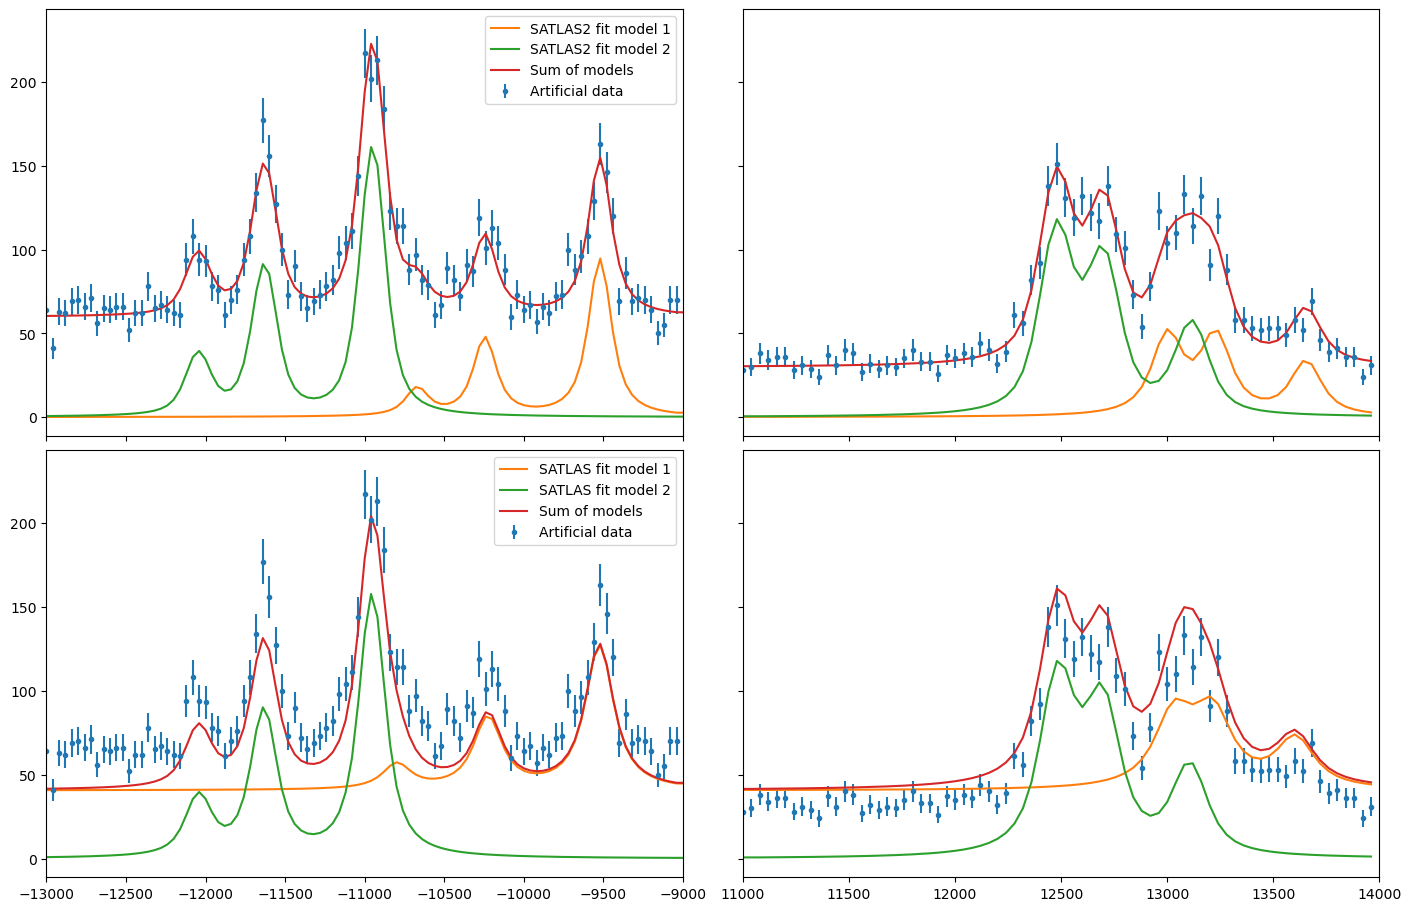

In [5]:
J = [0.5, 1.5]
FWHMG = 135
FWHML = 101

spin1 = 4
A1 = [5300, 100]
B1 = [0, 230]
C1 = [0, 0]
centroid1 = 400
bkg1 = 60
scale1 = 90

spin2 = 7
A2 = [3300, 60]
B2 = [0, 270]
C2 = [0, 0]
centroid2 = -100
bkg2 = 30
scale2 = 160

x = np.arange(-13000, -9000, 40)
x = np.hstack([x, np.arange(11000, 14000, 40)])
rng = np.random.default_rng(0)

hfs1 = satlas2.HFSModel(I=spin1,
                        J=J,
                        ABC=[A1[0], A1[1], B1[0], B1[1], C1[0], C1[1]],
                        centroid=centroid1,
                        fwhm=[FWHMG, FWHML],
                        scale=scale1,
                        background_params=[bkg1],
                        use_racah=True)
hfs2 = satlas2.HFSModel(I=spin2,
                        J=J,
                        ABC=[A2[0], A2[1], B2[0], B2[1], C2[0], C2[1]],
                        centroid=centroid2,
                        fwhm=[FWHMG, FWHML],
                        scale=scale2,
                        background_params=[bkg2],
                        use_racah=True)
y = hfs1.f(x) + hfs2.f(x) + satlas2.Step([bkg1, bkg2], [0]).f(x)
y = rng.poisson(y)

hfs1.params['centroid'].value = centroid1 - 100
hfs2.params['centroid'].value = centroid2 - 100
summodel = satlas2.SumModel([hfs1, hfs2], {
    'values': [bkg1, bkg2],
    'bounds': [0]
})

hfs3 = sat.HFSModel(spin1,
                    J, [A1[0], A1[1], B1[0], B1[1], C1[0], C1[1]],
                    centroid - 100, [FWHMG, FWHML],
                    scale=scale1,
                    background_params=bkg,
                    use_racah=True)
hfs4 = sat.HFSModel(spin2,
                    J, [A2[0], A2[1], B2[0], B2[1], C2[0], C2[1]],
                    centroid - 100, [FWHMG, FWHML],
                    scale=scale2,
                    background_params=[0],
                    use_racah=True)
hfs4.set_variation({'Cu': False, 'Cl': False, 'Background0': False})
summodel2 = hfs3 + hfs4

print('Fitting 1 dataset with chisquare (Pearson, satlas2)...')
start = time.time()
f = satlas2.chisquare_fit(summodel, x, y, modifiedSqrt(y), show_correl=False)
stop = time.time()
dt1 = stop - start
start = time.time()
sat.chisquare_fit(summodel2, x, y, modifiedSqrt(y))
summodel2.display_chisquare_fit(show_correl=False)
stop = time.time()
dt2 = stop - start
print('SATLAS2: {:.3} s, {:.0f} function evaluations'.format(
    dt1, f.result.nfev))
print('SATLAS1: {:.3} s'.format(dt2, f.result.nfev))

fig = plt.figure(constrained_layout=True, figsize=(14, 9))
gs = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)
ax11 = fig.add_subplot(gs[0, 0])
ax11.label_outer()
ax12 = fig.add_subplot(gs[0, 1])
ax12.label_outer()
ax21 = fig.add_subplot(gs[1, 0])
ax21.label_outer()
ax22 = fig.add_subplot(gs[1, 1])
ax22.label_outer()

ax11.errorbar(x, y, modifiedSqrt(y), fmt='.', label='Artificial data')
ax11.plot(x, hfs1.f(x), '-', label='SATLAS2 fit model 1')
ax11.plot(x, hfs2.f(x), '-', label='SATLAS2 fit model 2')
ax11.plot(x, summodel.f(x), '-', label='Sum of models')
ax11.set_xlim(-13000, -9000)
ax12.errorbar(x, y, modifiedSqrt(y), fmt='.', label='Artificial data')
ax12.plot(x, hfs1.f(x), '-', label='SATLAS2 fit model 1')
ax12.plot(x, hfs2.f(x), '-', label='SATLAS2 fit model 2')
ax12.plot(x, summodel.f(x), '-', label='Sum of models')
ax12.set_xlim(11000, 14000)
ax11.legend()

ax21.errorbar(x, y, modifiedSqrt(y), fmt='.', label='Artificial data')
ax21.plot(x, hfs3(x), '-', label='SATLAS fit model 1')
ax21.plot(x, hfs4(x), '-', label='SATLAS fit model 2')
ax21.plot(x, summodel2(x), '-', label='Sum of models')
ax21.set_xlim(-13000, -9000)
ax22.errorbar(x, y, modifiedSqrt(y), fmt='.', label='Artificial data')
ax22.plot(x, hfs3(x), '-', label='SATLAS fit model 1')
ax22.plot(x, hfs4(x), '-', label='SATLAS fit model 2')
ax22.plot(x, summodel2(x), '-', label='Sum of models')
ax22.set_xlim(11000, 14000)
ax21.legend()
plt.show()

The difference in result is due to the original SATLAS not implementing a Step background model, where the constant background has a different value left and right of some user-provided threshold value. Notice here that the speedup bue using the SATLAS2 implementation has risen from a factor 20 for a single spectrum to a factor 60.